<a id="6"></a>
## Utilisation  de Kmeans étape par étape

#### On doit <font color=red> binéariser </font> les dataset catégoriels (météo, banque2, etc...) : obligatoire

In [1]:
import numpy as np  
import pandas as pd  
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Importation du  dataset
dataset = pd.read_csv('./weather.nominalToBinary.csv')

,outlook=sunny,outlook=overcast,outlook=rainy,temperature=hot,temperature=mild,temperature=cool,humidity=normal,windy=FALSE,play
0,1,0,0,1,0,0,0,1,no
1,1,0,0,1,0,0,0,0,no
2,0,1,0,1,0,0,0,1,yes
3,0,0,1,0,1,0,0,1,yes
4,0,0,1,0,0,1,1,1,yes
5,0,0,1,0,0,1,1,0,no
6,0,1,0,0,0,1,1,0,yes
7,1,0,0,0,1,0,0,1,no
8,1,0,0,0,0,1,1,1,yes
9,0,0,1,0,1,0,1,1,yes


### Quelques infos sur les données

In [4]:
dataset.head()

,outlook=sunny,outlook=overcast,outlook=rainy,temperature=hot,temperature=mild,temperature=cool,humidity=normal,windy=FALSE,play
0,1,0,0,1,0,0,0,1,no
1,1,0,0,1,0,0,0,0,no
2,0,1,0,1,0,0,0,1,yes
3,0,0,1,0,1,0,0,1,yes
4,0,0,1,0,0,1,1,1,yes


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   outlook=sunny     14 non-null     int64 
 1   outlook=overcast  14 non-null     int64 
 2   outlook=rainy     14 non-null     int64 
 3   temperature=hot   14 non-null     int64 
 4   temperature=mild  14 non-null     int64 
 5   temperature=cool  14 non-null     int64 
 6   humidity=normal   14 non-null     int64 
 7   windy=FALSE       14 non-null     int64 
 8   play              14 non-null     object
dtypes: int64(8), object(1)
memory usage: 1.1+ KB


In [7]:
dataset.describe()

,outlook=sunny,outlook=overcast,outlook=rainy,temperature=hot,temperature=mild,temperature=cool,humidity=normal,windy=FALSE
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.357143,0.285714,0.357143,0.285714,0.428571,0.285714,0.500000,0.571429
std,0.497245,0.468807,0.497245,0.468807,0.513553,0.468807,0.518875,0.513553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000
75%,1.000000,0.750000,1.000000,0.750000,1.000000,0.750000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
dataset.isnull().sum()

outlook=sunny       0
outlook=overcast    0
outlook=rainy       0
temperature=hot     0
temperature=mild    0
temperature=cool    0
humidity=normal     0
windy=FALSE         0
play                0
dtype: int64

Pas de "Nans"  !  Great

### Nettoyage des données (si nécessaire)

In [10]:
dataset.drop_duplicates(inplace=True)

In [12]:
# La BD. !
X1 = dataset.values
X1

array([[1, 0, 0, 1, 0, 0, 0, 1, 'no'],
       [1, 0, 0, 1, 0, 0, 0, 0, 'no'],
       [0, 1, 0, 1, 0, 0, 0, 1, 'yes'],
       [0, 0, 1, 0, 1, 0, 0, 1, 'yes'],
       [0, 0, 1, 0, 0, 1, 1, 1, 'yes'],
       [0, 0, 1, 0, 0, 1, 1, 0, 'no'],
       [0, 1, 0, 0, 0, 1, 1, 0, 'yes'],
       [1, 0, 0, 0, 1, 0, 0, 1, 'no'],
       [1, 0, 0, 0, 0, 1, 1, 1, 'yes'],
       [0, 0, 1, 0, 1, 0, 1, 1, 'yes'],
       [1, 0, 0, 0, 1, 0, 1, 0, 'yes'],
       [0, 1, 0, 0, 1, 0, 0, 0, 'yes'],
       [0, 1, 0, 1, 0, 0, 1, 1, 'yes'],
       [0, 0, 1, 0, 1, 0, 0, 0, 'no']], dtype=object)

In [13]:
print(dataset.shape)
r=range(0,dataset.shape[1]-1) # dataset.shape[1] = nb colonnes (sauf la classe)


(14, 9)


range(0, 8)

In [15]:
# Les variables explicatives

X = dataset.iloc[:, r].values
X

array([[1, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 1, 0, 1, 0, 1, 1],
       [1, 0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 1],
       [0, 0, 1, 0, 1, 0, 0, 0]])

In [17]:
# On utilise la méthode elbow pour trouver le nbr optimal de clusters (à l'aide de kmeans)
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init='auto')
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

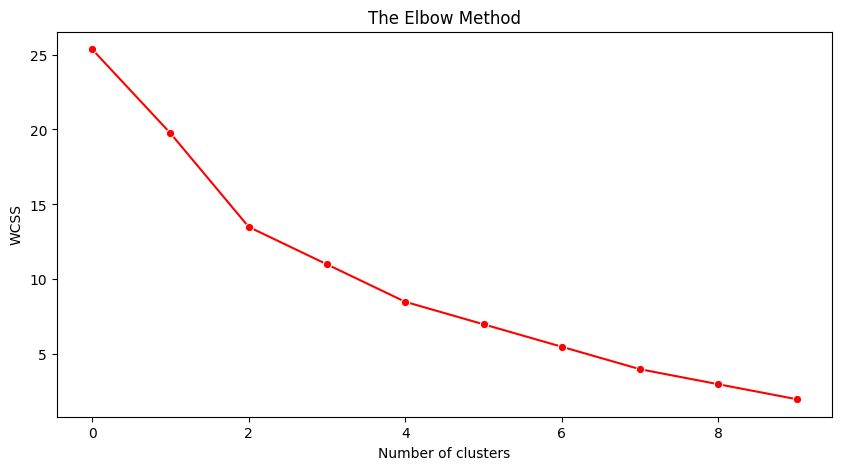

In [41]:
plt.figure(figsize=(10,5))
sns.lineplot(wcss, marker='o',color='red')

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.show() # optionnel


In [22]:
# Application de K-Means à notre dataset
kmeans = KMeans(n_clusters = 2, init = 'random', random_state = 42, n_init='auto')
y_kmeans = kmeans.fit_predict(X)
print("y_kmeans= ", y_kmeans)
# Ou de manière équivalente 
print("Les clusters des instances : : ", kmeans.labels_)

y_kmeans=  [0 0 0 1 1 1 1 0 1 1 0 0 0 1]
Les clusters des instances : :  [0 0 0 1 1 1 1 0 1 1 0 0 0 1]


In [23]:
kmeans.cluster_centers_

array([[5.71428571e-01, 4.28571429e-01, 5.55111512e-17, 5.71428571e-01,
        4.28571429e-01, 5.55111512e-17, 2.85714286e-01, 5.71428571e-01],
       [1.42857143e-01, 1.42857143e-01, 7.14285714e-01, 5.55111512e-17,
        4.28571429e-01, 5.71428571e-01, 7.14285714e-01, 5.71428571e-01]])

## Le contenu des clusters
Les instances (leur indice) dans les clusters

In [27]:
{i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

{0: array([ 0,  1,  2,  7, 10, 11, 12]),
 1: array([ 3,  4,  5,  6,  8,  9, 13])}

In [29]:
# la valeur de l'erreur SSE  du clustering
kmeans.inertia_

19.71428571428571

## Et pour le cas avec init=kmeans++

In [30]:
# Fitting K-Means à notre dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42, n_init='auto')
M=kmeans.fit(X)
print("M=", M)
y_kmeans = kmeans.fit_predict(X)
print("y_kmeans=", y_kmeans)
print("M.labels_ : ", M.labels_)

M= KMeans(n_clusters=2, n_init='auto', random_state=42)
y_kmeans= [1 1 0 1 0 0 0 1 0 1 1 1 0 1]
M.labels_ :  [1 1 0 1 0 0 0 1 0 1 1 1 0 1]


In [31]:
kmeans.cluster_centers_

array([[1.66666667e-01, 5.00000000e-01, 3.33333333e-01, 3.33333333e-01,
        5.55111512e-17, 6.66666667e-01, 8.33333333e-01, 6.66666667e-01],
       [5.00000000e-01, 1.25000000e-01, 3.75000000e-01, 2.50000000e-01,
        7.50000000e-01, 5.55111512e-17, 2.50000000e-01, 5.00000000e-01]])

In [33]:
{i: np.where(M.labels_ == i)[0] for i in range(M.n_clusters)}

{0: array([ 2,  4,  5,  6,  8, 12]),
 1: array([ 0,  1,  3,  7,  9, 10, 11, 13])}

In [35]:
# Erreur SSE de ce clustering
kmeans.inertia_

19.75

In [37]:
# Nbr d'itérations pour converger
kmeans.n_iter_

3

In [39]:
# les labels
kmeans.labels_

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int32)

<a id="7"></a>
## Visualisation

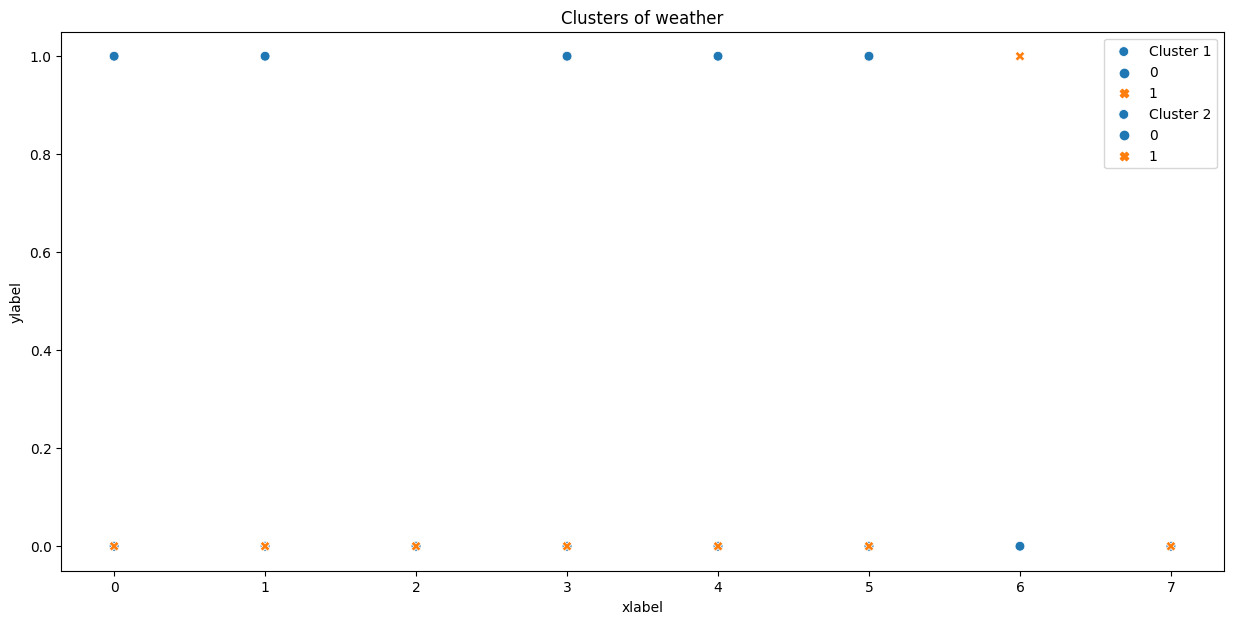

In [40]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot((X[y_kmeans == 0, 0], X[y_kmeans == 0, 1]), color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot((X[y_kmeans == 1, 0], X[y_kmeans == 1, 1]), color = 'blue', label = 'Cluster 2',s=50)
#sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
#sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
#sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
#sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
#                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of weather')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.legend()
plt.show()

Big Thanks to:

* https://www.datascience.com/blog/k-means-clustering
* https://www.superdatascience.com
* https://www.udemy.com
